In [ ]:
import gc
gc.collect()

264

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os

asmb_img_feat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ASME/tools/image-similarity/ass_fingerprints.csv')

In [ ]:
asmb_img_feat

,ID,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,112724_d31b37f0.jpg,0.000000,0.190691,0.472345,0.000000,0.013732,0.000000,0.170067,0.539181,0.066807,...,0.014178,1.439335,1.598269,0.168250,1.568652,0.017419,0.982904,0.000000,0.045880,0.117176
1,112724_fc7e904f.jpg,0.017238,0.000417,0.000000,0.000000,1.303375,0.000000,0.039989,0.000000,0.032767,...,0.413675,0.312355,0.000000,0.070699,0.146244,0.053720,0.491637,0.111888,0.000000,0.003071
2,112738_1107ad1c.jpg,0.118893,0.419710,0.794558,0.070978,0.531443,0.225113,0.253235,0.159569,0.003234,...,0.161067,0.056812,0.131535,0.211066,3.588871,0.397220,1.491368,0.130227,0.296397,0.284691
3,112743_4379a6b3.jpg,0.000000,2.339096,0.417179,0.244547,0.449220,0.000000,0.161348,0.009708,0.196842,...,0.333561,0.160605,1.663338,0.000000,0.128295,0.349341,2.893769,0.041533,0.028296,0.897304
4,112751_bc27f8f7.jpg,0.000000,0.410036,0.068035,0.000000,1.961569,0.264478,0.337994,0.513261,0.057694,...,0.039488,0.458276,0.005459,0.068246,0.000818,0.000000,1.606962,0.008812,0.004494,0.093224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7810,99833_12f36e36.jpg,0.013250,1.843197,0.058609,0.092167,0.045038,0.000000,0.135979,0.031835,0.288697,...,1.181552,0.048828,0.279932,0.345046,0.087780,1.429587,1.195429,1.144585,0.023029,0.984818
7811,99842_e4ee42a9.jpg,0.302368,1.260303,0.052746,0.077235,0.049658,0.096068,0.753716,0.060498,0.000000,...,0.000000,0.865893,0.749851,0.000000,0.154014,0.363734,1.990092,0.099748,0.130635,1.968596
7812,99843_deca7822.jpg,0.000000,0.414320,1.037950,0.000000,0.000000,0.017595,0.591169,0.067967,0.002737,...,0.123867,0.000000,0.241382,0.047378,3.230129,0.638570,1.742423,0.059094,0.212718,0.070106
7813,99849_96caf43a.jpg,0.241024,0.099350,0.434098,0.099713,0.028593,0.000000,0.565296,0.335997,0.003532,...,0.009673,0.852686,0.444081,0.003366,1.380756,0.495619,0.658751,0.000000,1.383587,0.654382


In [ ]:
val_img_feat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ASME/tools/image-similarity/val_fingerprints.csv')
val_img_feat

,ID,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,22057_4947db57.jpg,0.000000,0.087099,0.000000,0.000000,0.652887,0.0,0.956652,1.606378,0.000000,...,0.100315,0.765789,0.699494,0.014076,0.718475,0.169887,0.124306,0.046764,0.468679,0.098382
1,34103_6635d58e.jpg,0.011918,0.522110,0.330902,0.000000,0.039049,0.0,0.586499,0.625905,0.068437,...,0.021017,0.000000,0.558243,0.079836,0.751304,0.009114,0.922297,0.020852,0.000000,0.794662
2,44400_388ed3d0.jpg,0.040337,0.881504,0.000000,0.959045,0.000000,0.0,1.393249,0.093707,0.198745,...,0.581119,0.000000,0.107407,0.043610,0.430167,0.481306,4.333909,0.742294,0.952765,1.397724


In [ ]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * (np.linalg.norm(b)))

print(cosine_similarity(asmb_img_feat.loc[6].drop('ID'),val_img_feat.loc[0].drop('ID')))

0.38948411366556573


In [196]:
# val_1 = []

# for j in range(len(asmb_img_feat)):
#     cosim = cosine_similarity(asmb_img_feat.loc[j].drop('ID'),val_img_feat.loc[0].drop('ID'))
#     val_1.append((val_img_feat['ID'][0],asmb_img_feat['ID'][j],cosim))
    
val_2 = []

for j in range(len(asmb_img_feat)):
    cosim = cosine_similarity(asmb_img_feat.loc[j].drop('ID'),val_img_feat.loc[1].drop('ID'))
    val_2.append((val_img_feat['ID'][1],asmb_img_feat['ID'][j],cosim))

# val_3 = []

# for j in range(len(asmb_img_feat)):
#     cosim = cosine_similarity(asmb_img_feat.loc[j].drop('ID'),val_img_feat.loc[2].drop('ID'))
#     val_3.append((val_img_feat['ID'][2],asmb_img_feat['ID'][j],cosim))

In [197]:
sorted(val_2, reverse=True, key=lambda a: a[2])

[('34103_6635d58e.jpg', '90743_e2653f76.jpg', 0.9191016473967843),
 ('34103_6635d58e.jpg', '63879_93fa4cbd.jpg', 0.9168569672887612),
 ('34103_6635d58e.jpg', '72950_5074f5a3.jpg', 0.9145126563122005),
 ('34103_6635d58e.jpg', '137738_274a2e0f.jpg', 0.9027964311851627),
 ('34103_6635d58e.jpg', '55765_fa96c6e1.jpg', 0.9022567612648493),
 ('34103_6635d58e.jpg', '51704_6a60aefd.jpg', 0.8955612568318776),
 ('34103_6635d58e.jpg', '52872_46308d49.jpg', 0.8942760413480941),
 ('34103_6635d58e.jpg', '35954_b132b1dd.jpg', 0.8907555540298716),
 ('34103_6635d58e.jpg', '90207_d2db9054.jpg', 0.8903944685080241),
 ('34103_6635d58e.jpg', '36425_a4c0f63d.jpg', 0.8900292559893045),
 ('34103_6635d58e.jpg', '65380_efaa94f1.jpg', 0.8885546385106561),
 ('34103_6635d58e.jpg', '52890_e23bf00b.jpg', 0.8881189776408648),
 ('34103_6635d58e.jpg', '130916_1d63ed89.jpg', 0.8865076897695893),
 ('34103_6635d58e.jpg', '99642_1632d65b.jpg', 0.8859372622282261),
 ('34103_6635d58e.jpg', '115093_424371f6.jpg', 0.88444352526

In [ ]:
sorted(val_1, reverse=True, key=lambda a: a[2])[0][1]

'45428_13340c06.jpg'

Text(0.5, 1.0, 'Fifth')

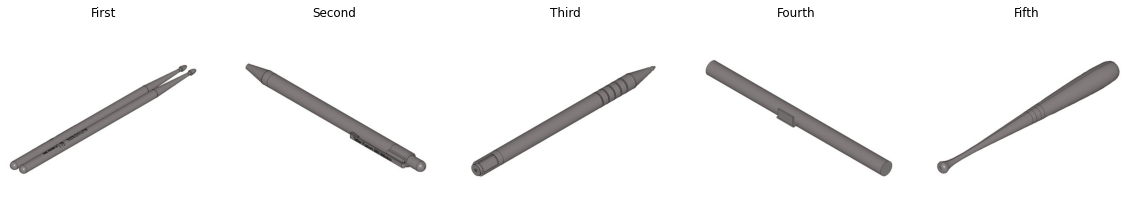

In [198]:
#import libraries
import cv2
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(20, 10))

# setting values to rows and column variables
rows = 1
columns = 5

# Top 5 assemblies
top_5 = ['90743_e2653f76.jpg', '63879_93fa4cbd.jpg', '72950_5074f5a3.jpg', '137738_274a2e0f.jpg', '55765_fa96c6e1.jpg']

# reading images
Image1 = cv2.imread(top_5[0])
Image2 = cv2.imread(top_5[1])
Image3 = cv2.imread(top_5[2])
Image4 = cv2.imread(top_5[3])
Image5 = cv2.imread(top_5[4])
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Third")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("Fourth")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("Fifth")

In [ ]:
file_list

['25475_70092bfb.jpg',
 '32062_4995d592.jpg',
 '81795_ad62e590.jpg',
 '45589_49e3c7ea.jpg',
 '54735_cf8dcb52.jpg',
 '73650_03e341a2.jpg',
 '73650_c6ddbe3e.jpg',
 '135385_c8fedd05.jpg',
 '84024_5c75426c.jpg',
 '89161_9536e126.jpg',
 '95524_32ff1532.jpg',
 '95613_e9f7d50a.jpg']

Text(0.5, 1.0, 'First')

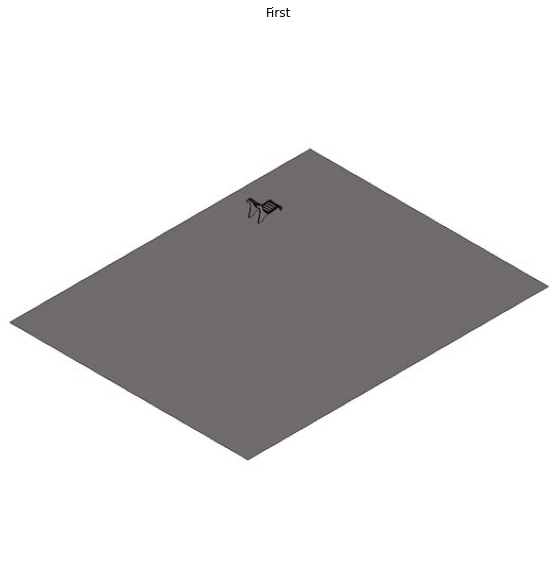

In [ ]:
root_dir = '/content/drive/MyDrive/Colab Notebooks/ASME/tools/image-clustering/assem_results'
file_list = os.listdir(f'{root_dir}/cluster_with_12/cluster_0')

fig = plt.figure(figsize=(20, 10))

# setting values to rows and column variables
rows = 1
columns = 5

Image1 = cv2.imread(f'{root_dir}/cluster_with_12/cluster_0/{file_list[0]}')

# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("First")

In [134]:
e_train_128 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ASME/output_excel/encoded_128_train.xlsx')
e_train_128.head()

,assembly_name,assembly_name.1,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127
0,112724_d31b37f0,112724_d31b37f0,0,0.137594,0.0,0.0,0.0,0.000000,0.0,0.950822,...,0,1.562391,0.653546,0.000000,0.000000,0.000000,1.396144,0.0,0.0,2.822387
1,112724_fc7e904f,112724_fc7e904f,0,5.135285,0.0,0.0,0.0,2.402241,0.0,1.739155,...,0,0.000000,3.711068,1.031779,2.850535,2.583353,1.945232,0.0,0.0,1.797562
2,112738_1107ad1c,112738_1107ad1c,0,0.000000,0.0,0.0,0.0,0.881284,0.0,2.427800,...,0,0.769624,0.000000,0.000000,0.512840,0.000000,0.000000,0.0,0.0,1.122455
3,112743_4379a6b3,112743_4379a6b3,0,2.997108,0.0,0.0,0.0,0.000000,0.0,2.452938,...,0,2.163938,0.000000,0.000000,0.000000,0.000000,0.129115,0.0,0.0,2.026469
4,112751_bc27f8f7,112751_bc27f8f7,0,3.883176,0.0,0.0,0.0,3.741782,0.0,1.961282,...,0,3.753209,1.970310,1.323504,0.261104,3.383520,1.873249,0.0,0.0,2.884002


In [135]:
e_test_128 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ASME/output_excel/encoded_128_test.xlsx')
e_test_128.head()

,assembly_name,assembly_name.1,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127
0,22057_4947db57,22057_4947db57,0.000000,8.241863,0,0,0,0,0,0.000000,...,4.851559,0,0,0.000000,0,0,2.729104,0.959726,0,4.886349
1,34103_6635d58e,34103_6635d58e,4.103655,0.090514,0,0,0,0,0,2.528927,...,3.371104,0,0,0.000000,0,0,4.372602,1.704472,0,0.000000
2,44400_388ed3d0,44400_388ed3d0,1.314658,1.308846,0,0,0,0,0,2.411363,...,1.468509,0,0,2.101436,0,0,2.282723,2.795923,0,0.818651


In [136]:
e_train_64 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ASME/output_excel/encoded_64_train.xlsx')
e_train_64.head()

,assembly_name,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63
0,112724_d31b37f0,0.0,0.000000,3.377964,1.978872,0,0.0,6.922759,0.000000,0.0,...,2.797778,4.452373,0.000000,0.000000,2.724925,4.209180,1.300538,0.316840,0,0.0
1,112724_fc7e904f,0.0,0.000000,1.137828,9.872782,0,0.0,9.227469,3.888608,0.0,...,0.000000,8.610390,0.000000,0.000000,6.964218,2.968380,1.742976,0.000000,0,0.0
2,112738_1107ad1c,0.0,0.042308,1.425732,1.620300,0,0.0,3.938786,0.321106,0.0,...,3.369959,0.636045,0.000000,3.093534,1.541715,2.801225,1.585634,0.913098,0,0.0
3,112743_4379a6b3,0.0,0.000000,5.235877,0.000000,0,0.0,5.978051,0.000000,0.0,...,2.431041,2.975364,0.000000,1.405675,1.522078,3.878124,2.223750,0.000000,0,0.0
4,112751_bc27f8f7,0.0,0.000000,3.342382,9.679792,0,0.0,12.175408,0.347293,0.0,...,0.189673,9.932414,1.812799,0.000000,4.464767,6.948725,0.000000,2.159650,0,0.0


In [137]:
e_test_64 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ASME/output_excel/encoded_64_test.xlsx')
e_test_64.head()

,assembly_name,assembly_name.1,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63
0,22057_4947db57,22057_4947db57,0,0.980623,2.452012,0,2.883866,0,3.878335,1.376635,...,2.140931,0,2.077823,2.655428,5.715210,0,0.000000,0,0,2.973061
1,34103_6635d58e,34103_6635d58e,0,1.844801,3.355044,0,5.452687,0,4.363813,2.332005,...,1.158586,0,3.771693,1.534931,2.993455,0,0.364283,0,0,0.000000
2,44400_388ed3d0,44400_388ed3d0,0,5.272892,4.867105,0,2.304540,0,4.240686,2.263388,...,0.000000,0,2.147169,6.755218,4.628705,0,0.000000,0,0,0.000000


In [138]:
e_train_32 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ASME/output_excel/encoded_32_train.xlsx')
e_train_32.head()

,assembly_name,assembly_name.1,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31
0,112724_d31b37f0,112724_d31b37f0,0.0,3.964567,0.860066,1.950949,0,0,5.845433,3.174048,...,0,7.161595,2.964079,3.070149,0.0,0,2.054093,1.472372,3.262718,0.000000
1,112724_fc7e904f,112724_fc7e904f,0.0,4.628386,11.584597,10.732331,0,0,4.728606,8.073955,...,0,12.826477,8.133413,0.543762,0.0,0,1.759249,7.752053,6.199665,1.015611
2,112738_1107ad1c,112738_1107ad1c,0.0,0.100896,0.282506,3.015472,0,0,5.153003,2.232475,...,0,2.226511,4.284328,0.000000,0.0,0,1.669224,3.815611,6.431141,0.000000
3,112743_4379a6b3,112743_4379a6b3,0.0,9.589696,2.471960,0.883122,0,0,10.337915,7.800437,...,0,2.415608,12.989976,0.763380,0.0,0,6.542916,5.778873,10.099847,0.000000
4,112751_bc27f8f7,112751_bc27f8f7,0.0,10.936187,12.770621,9.259506,0,0,10.619331,10.028563,...,0,16.431526,11.212645,3.835496,0.0,0,0.000000,11.410551,8.521811,0.000000


In [139]:
e_test_32 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ASME/output_excel/encoded_32_test.xlsx')
e_test_32.head()

,assembly_name,assembly_name.1,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31
0,22057_4947db57,22057_4947db57,5.678275,0.684284,2.133509,1.482585,6.373733,6.858589,0.173693,0,...,8.122068,7.083177,5.900684,0,6.681713,0.967949,8.421191,2.280809,0,0
1,34103_6635d58e,34103_6635d58e,4.981407,0.000000,4.606368,8.890055,3.391141,7.030626,0.000000,0,...,2.589323,6.372560,5.722369,0,1.965462,3.559086,1.892331,0.754871,0,0
2,44400_388ed3d0,44400_388ed3d0,2.212016,3.157279,4.155448,4.079028,5.837813,3.073744,0.000000,0,...,4.852621,4.403985,4.037684,0,9.888210,11.708071,5.022889,0.000000,0,0


In [140]:
val_1 = []

for j in range(len(e_train_128)):
    cosim = cosine_similarity(e_train_128.loc[j].drop(['assembly_name', 'assembly_name.1']),e_test_128.loc[0].drop(['assembly_name', 'assembly_name.1']))
    val_1.append((e_test_128['assembly_name'][0],e_train_128['assembly_name'][j],cosim))
    

In [141]:
sorted(val_1, reverse=True, key=lambda a: a[2])

[('22057_4947db57', '79999_865aae34', 0.442676578968517),
 ('22057_4947db57', '75650_1fd1d01f', 0.44134051060878654),
 ('22057_4947db57', '76176_39eb3e67', 0.43756762694363954),
 ('22057_4947db57', '136868_f55dd354', 0.4364218659780741),
 ('22057_4947db57', '131260_4f9f60b1', 0.43175761111168454),
 ('22057_4947db57', '127280_9c1b1aa9', 0.43042283412087057),
 ('22057_4947db57', '135381_6a74322d', 0.42519790628117854),
 ('22057_4947db57', '117939_8142cb36', 0.42500875363574947),
 ('22057_4947db57', '38832_5e2b4d14', 0.4236797136800319),
 ('22057_4947db57', '139909_a1585b3b', 0.42076665127722984),
 ('22057_4947db57', '146793_98e3f8b5', 0.41985058461892416),
 ('22057_4947db57', '24156_fe9248f3', 0.4183975393756764),
 ('22057_4947db57', '45300_1710ace7', 0.4173041179295995),
 ('22057_4947db57', '135379_916917c5', 0.41690873000764855),
 ('22057_4947db57', '147514_859a5b9e', 0.41583454781576473),
 ('22057_4947db57', '136832_d2438c00', 0.4136912245793431),
 ('22057_4947db57', '24920_51bb7cea',

In [144]:
cd /content/drive/MyDrive/Colab Notebooks/ASME/tools/feature-extractors/assembly-thumbnails

/content/drive/MyDrive/Colab Notebooks/ASME/tools/feature-extractors/assembly-thumbnails


Text(0.5, 1.0, 'Fifth')

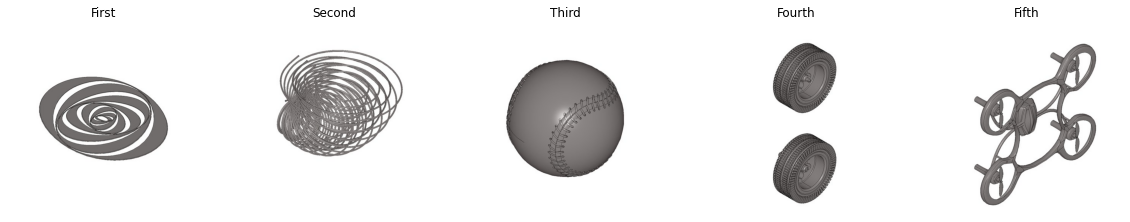

In [145]:
# create figure
fig = plt.figure(figsize=(20, 10))

# setting values to rows and column variables
rows = 1
columns = 5

# Top 5 assemblies
top_5 = ['79999_865aae34.jpg', '75650_1fd1d01f.jpg', '76176_39eb3e67.jpg', '136868_f55dd354.jpg', '131260_4f9f60b1.jpg']

# reading images
Image1 = cv2.imread(top_5[0])
Image2 = cv2.imread(top_5[1])
Image3 = cv2.imread(top_5[2])
Image4 = cv2.imread(top_5[3])
Image5 = cv2.imread(top_5[4])
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Third")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("Fourth")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("Fifth")

In [143]:
raw_train = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ASME/output_excel/raw_train.xlsx')
raw_train.head()

,assembly_name,ConeSurfaceType,CylinderSurfaceType,EllipticalConeSurfaceType,EllipticalCylinderSurfaceType,NurbsSurfaceType,PlaneSurfaceType,SphereSurfaceType,TorusSurfaceType,xx,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,112724_d31b37f0,-0.109509,-0.009986,-0.018406,0.284019,-0.038283,-0.210926,-0.003167,0.049928,-0.015999,...,-0.635971,1.763098,2.481182,-0.133912,0.462437,-0.706219,-0.305582,-0.732149,-0.469627,-0.807883
1,112724_fc7e904f,-0.003271,-0.106724,-0.018406,-0.054465,0.033421,-0.225574,-0.151808,0.027084,-0.015999,...,0.843835,-0.188653,-0.748891,-0.452199,-0.763192,-0.607560,-0.718440,-0.365236,-0.627310,-1.010639
2,112738_1107ad1c,-0.139862,-0.168697,-0.018406,-0.054465,-0.229491,-0.293181,-0.151808,-0.155665,-0.015999,...,-0.091869,-0.631213,-0.483061,0.005787,2.203176,0.326008,0.121728,-0.305098,0.391363,-0.510223
3,112743_4379a6b3,-0.139862,-0.209509,-0.018406,-0.054465,-0.229491,-0.315716,-0.151808,-0.155665,-0.015999,...,0.547079,-0.451460,2.612685,-0.682874,-0.778658,0.195882,1.300297,-0.595951,-0.530061,0.578340
4,112751_bc27f8f7,-0.094332,-0.133932,-0.018406,-0.054465,-0.160178,-0.206419,-0.151808,-0.132821,-0.015999,...,-0.542218,0.064059,-0.737859,-0.460203,-0.888500,-0.753561,0.218872,-0.703252,-0.611865,-0.850444


In [146]:
raw_test = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ASME/output_excel/raw_test.xlsx')
raw_test.head()

,assembly_name,ConeSurfaceType,CylinderSurfaceType,EllipticalConeSurfaceType,EllipticalCylinderSurfaceType,NurbsSurfaceType,PlaneSurfaceType,SphereSurfaceType,TorusSurfaceType,xx,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,22057_4947db57,-0.339683,-0.872968,0,0,1.407465,-1.294283,0,1.413068,-0.703633,...,-0.540813,1.414214,0.968132,-1.181163,0.590274,-0.256182,-0.914309,-0.667979,-0.013203,-1.252959
1,34103_6635d58e,1.358732,1.400043,0,0,-0.584231,0.153559,0,-0.657241,-0.710575,...,-0.861247,-0.707107,0.408705,1.264110,0.817824,-1.076392,-0.477206,-0.745525,-1.218090,0.058527
2,44400_388ed3d0,-1.019049,-0.527075,0,0,-0.823235,1.140724,0,-0.755827,1.414208,...,1.402061,-0.707107,-1.376837,-0.082947,-1.408098,1.332573,1.391515,1.413505,1.231293,1.194432


In [202]:
val_1 = []

for j in range(len(e_train_128)):
    cosim = cosine_similarity(raw_train.loc[j][1:],raw_test.loc[2][1:])
    val_1.append((raw_test['assembly_name'][2],raw_train['assembly_name'][j],cosim))

In [203]:
sorted(val_1, reverse=True, key=lambda a: a[2])

[('44400_388ed3d0', '33175_5454d0c4', 0.5561132676512915),
 ('44400_388ed3d0', '34563_52848c45', 0.5297077412395194),
 ('44400_388ed3d0', '138946_b45b2c50', 0.5189013956313501),
 ('44400_388ed3d0', '126747_f591885e', 0.5134588952679291),
 ('44400_388ed3d0', '54944_acf9bddb', 0.509842277438064),
 ('44400_388ed3d0', '120295_5191ea57', 0.4734483392096708),
 ('44400_388ed3d0', '147161_e84685fc', 0.4626040034050549),
 ('44400_388ed3d0', '56078_6d7f171c', 0.4624566709263644),
 ('44400_388ed3d0', '27449_088a5bd0', 0.45815230354254666),
 ('44400_388ed3d0', '56433_67c97ec6', 0.45473267457393657),
 ('44400_388ed3d0', '84123_a5d42952', 0.4513020903784977),
 ('44400_388ed3d0', '145946_83eeaba3', 0.447137609674584),
 ('44400_388ed3d0', '136426_c1691125', 0.44239485326073547),
 ('44400_388ed3d0', '144026_e6a5de9a', 0.43588815811403453),
 ('44400_388ed3d0', '66895_f7864602', 0.4346136949244972),
 ('44400_388ed3d0', '44414_2e35dc99', 0.434423085723751),
 ('44400_388ed3d0', '136426_2f603ead', 0.4291593

Text(0.5, 1.0, 'Fifth')

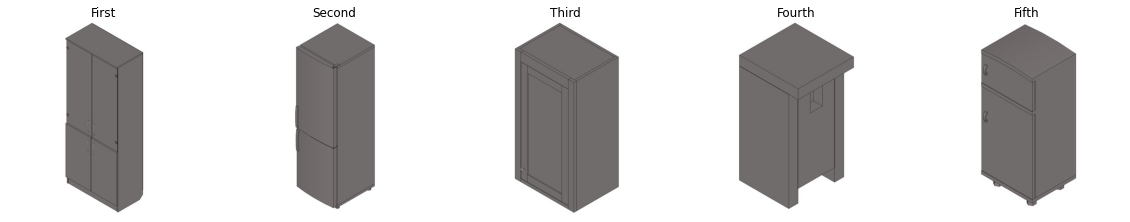

In [204]:
# create figure
fig = plt.figure(figsize=(20, 10))

# setting values to rows and column variables
rows = 1
columns = 5

# Top 5 assemblies
top_5 = ['33175_5454d0c4.jpg', '34563_52848c45.jpg', '138946_b45b2c50.jpg', '126747_f591885e.jpg', '54944_acf9bddb.jpg']

# reading images
Image1 = cv2.imread(top_5[0])
Image2 = cv2.imread(top_5[1])
Image3 = cv2.imread(top_5[2])
Image4 = cv2.imread(top_5[3])
Image5 = cv2.imread(top_5[4])
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Third")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("Fourth")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("Fifth")

In [153]:
com_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ASME/output_excel/community.xlsx')
com_data.head()

,ass_name,likes_count,comments_count,views_count,products,categories,industries
0,112724_d31b37f0,1,0,428,Fusion 360,Miscellaneous,"Media & Entertainment, Other Industries"
1,112724_fc7e904f,1,0,428,Fusion 360,Miscellaneous,"Media & Entertainment, Other Industries"
2,112738_1107ad1c,1,0,577,Fusion 360,Mechanical Engineering,Product Design & Manufacturing
3,112743_4379a6b3,0,0,244,Fusion 360,Mechanical Engineering,Product Design & Manufacturing
4,112751_bc27f8f7,0,0,214,Fusion 360,Product Design,Product Design & Manufacturing


In [163]:
com_data['likes_count'].unique()

array([  1,   0,   5,   9,   2,   6,   4,   8,  14,   3,  34,  10,   7,
        15,  22,  13,  46,  17,  16,  11,  24,  20,  18,  12,  37,  35,
        42,  38,  19,  27,  21,  45,  32,  25,  28,  36,  40,  67,  23,
        26,  50,  33,  43,  52,  55, 192, 295,  86,  54,  31])

In [172]:
raw_test.columns[1:15]

Index(['ConeSurfaceType', 'CylinderSurfaceType', 'EllipticalConeSurfaceType',
       'EllipticalCylinderSurfaceType', 'NurbsSurfaceType', 'PlaneSurfaceType',
       'SphereSurfaceType', 'TorusSurfaceType', 'xx', 'yy', 'zz', 'xy', 'yz',
       'xz'],
      dtype='object')

In [ ]:
raw_test.columns[16:21]

In [187]:
raw_test.columns[9:21]

Index(['xx', 'yy', 'zz', 'xy', 'yz', 'xz', 'vertex_count', 'edge_count',
       'face_count', 'loop_count', 'shell_count', 'body_count'],
      dtype='object')

# Test Data

In [205]:
cd /content/drive/MyDrive/Colab Notebooks/ASME/tools/feature-extractors

/content/drive/MyDrive/Colab Notebooks/ASME/tools/feature-extractors


In [207]:
!python feature-extractor.py --feature assembly_thumbnail

Extracting assembly thumbnail PNG files from assemblies
Processing assemblies: 100% 7/7 [00:02<00:00,  2.85it/s]


In [208]:
cd /content/drive/MyDrive/Colab Notebooks/ASME/tools/image-similarity

/content/drive/MyDrive/Colab Notebooks/ASME/tools/image-similarity


In [209]:
!python fingerprint-generator.py features ../feature-extractors/test-assembly-thumbnails/ ./test-fingerprints.csv

Extracting features
Acquiring model "ResNet50"
Assuming model argument is a named model
Successfully acquired model					
Found 7 images
100% 7/7 [00:02<00:00,  3.10it/s]
Wrote features to: "./test-fingerprints.csv"


In [210]:
test_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ASME/tools/image-similarity/test-fingerprints.csv')
test_raw

,ID,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,43337_e436b759.jpg,0.374548,0.648277,0.111825,0.000000,0.000000,0.010776,1.126168,0.118297,0.000000,...,0.069507,0.182206,0.371718,0.087021,0.000000,0.397343,1.790644,0.136890,0.444802,0.150413
1,48116_e48b3d1e.jpg,0.000000,0.018194,0.207036,0.000000,0.183281,0.013508,0.352247,0.581686,0.126572,...,0.000000,0.000000,0.118662,0.202606,1.792034,0.313443,0.271682,0.000000,0.064831,1.120443
2,41685_df8ac866.jpg,0.021169,0.631214,0.017707,0.107042,1.514114,0.129440,0.038843,0.463381,0.032033,...,0.000000,0.000000,0.682692,1.096896,1.931636,0.052407,0.438360,0.000000,0.461699,0.160516
3,78600_3f295e84.jpg,0.037508,1.641201,0.085965,0.086284,0.024454,0.083032,0.247668,0.072427,0.000000,...,0.017322,0.063284,0.009723,0.841124,3.146458,0.020961,1.857070,0.534159,0.567128,0.321992
4,38929_e41edd3a.jpg,0.000605,0.306101,0.003796,0.069153,0.000000,0.000000,0.144572,0.000000,0.185909,...,0.277511,0.644683,0.134144,0.000000,0.062666,1.683785,0.563963,0.196550,0.000000,2.193227
5,49328_ec54acac.jpg,0.033454,0.187871,0.615816,0.018426,0.079243,0.033285,0.162499,0.105270,0.041594,...,0.121964,0.132655,0.000000,1.240170,0.406358,0.098279,0.715130,0.191567,0.248650,0.082881
6,52886_5743bcf0.jpg,0.000000,0.429087,0.224343,0.000000,1.170893,0.116989,0.498680,0.021158,0.002060,...,0.168660,1.065045,0.035375,0.738085,0.134141,0.130014,0.297730,0.320367,0.319034,0.862706


In [212]:
asmb_img_feat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ASME/tools/image-similarity/ass_fingerprints.csv')
asmb_img_feat

,ID,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,112724_d31b37f0.jpg,0.000000,0.190691,0.472345,0.000000,0.013732,0.000000,0.170067,0.539181,0.066807,...,0.014178,1.439335,1.598269,0.168250,1.568652,0.017419,0.982904,0.000000,0.045880,0.117176
1,112724_fc7e904f.jpg,0.017238,0.000417,0.000000,0.000000,1.303375,0.000000,0.039989,0.000000,0.032767,...,0.413675,0.312355,0.000000,0.070699,0.146244,0.053720,0.491637,0.111888,0.000000,0.003071
2,112738_1107ad1c.jpg,0.118893,0.419710,0.794558,0.070978,0.531443,0.225113,0.253235,0.159569,0.003234,...,0.161067,0.056812,0.131535,0.211066,3.588871,0.397220,1.491368,0.130227,0.296397,0.284691
3,112743_4379a6b3.jpg,0.000000,2.339096,0.417179,0.244547,0.449220,0.000000,0.161348,0.009708,0.196842,...,0.333561,0.160605,1.663338,0.000000,0.128295,0.349341,2.893769,0.041533,0.028296,0.897304
4,112751_bc27f8f7.jpg,0.000000,0.410036,0.068035,0.000000,1.961569,0.264478,0.337994,0.513261,0.057694,...,0.039488,0.458276,0.005459,0.068246,0.000818,0.000000,1.606962,0.008812,0.004494,0.093224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7810,99833_12f36e36.jpg,0.013250,1.843197,0.058609,0.092167,0.045038,0.000000,0.135979,0.031835,0.288697,...,1.181552,0.048828,0.279932,0.345046,0.087780,1.429587,1.195429,1.144585,0.023029,0.984818
7811,99842_e4ee42a9.jpg,0.302368,1.260303,0.052746,0.077235,0.049658,0.096068,0.753716,0.060498,0.000000,...,0.000000,0.865893,0.749851,0.000000,0.154014,0.363734,1.990092,0.099748,0.130635,1.968596
7812,99843_deca7822.jpg,0.000000,0.414320,1.037950,0.000000,0.000000,0.017595,0.591169,0.067967,0.002737,...,0.123867,0.000000,0.241382,0.047378,3.230129,0.638570,1.742423,0.059094,0.212718,0.070106
7813,99849_96caf43a.jpg,0.241024,0.099350,0.434098,0.099713,0.028593,0.000000,0.565296,0.335997,0.003532,...,0.009673,0.852686,0.444081,0.003366,1.380756,0.495619,0.658751,0.000000,1.383587,0.654382


In [246]:
test_results_0 = []

for j in range(len(asmb_img_feat)):
    cosim = cosine_similarity(asmb_img_feat.loc[j].drop('ID'),test_raw.loc[6].drop('ID'))
    test_results_0.append((test_raw['ID'][6],asmb_img_feat['ID'][j],cosim))

In [247]:
top = sorted(test_results_0, reverse=True, key=lambda a: a[2])

Text(0.5, 1.0, 'Fifth')

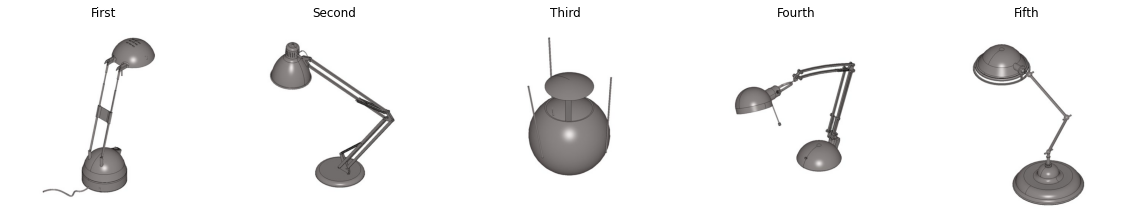

In [248]:
# create figure
fig = plt.figure(figsize=(20, 10))

# setting values to rows and column variables
rows = 1
columns = 5

# reading images
Image1 = cv2.imread(top[0][1])
Image2 = cv2.imread(top[1][1])
Image3 = cv2.imread(top[2][1])
Image4 = cv2.imread(top[3][1])
Image5 = cv2.imread(top[4][1])
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Third")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("Fourth")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("Fifth")

In [222]:
cd /content/drive/MyDrive/Colab Notebooks/ASME/tools/feature-extractors/assembly-thumbnails

/content/drive/MyDrive/Colab Notebooks/ASME/tools/feature-extractors/assembly-thumbnails


# Test-New

In [251]:
test_raw_dt = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ASME/output_excel/raw_test_dt.xlsx')
test_raw_dt

,assembly_name,ConeSurfaceType,CylinderSurfaceType,EllipticalConeSurfaceType,EllipticalCylinderSurfaceType,NurbsSurfaceType,PlaneSurfaceType,SphereSurfaceType,TorusSurfaceType,xx,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,38929_e41edd3a,-0.315173,-0.795326,0,-0.751882,-0.854741,-0.869256,-0.830366,-0.731204,-0.410038,...,1.921003,0.924894,-0.254619,-1.291530,-0.883767,2.380875,-0.448151,-0.003037,-1.541242,2.098452
1,41685_df8ac866,-0.455250,-0.423361,0,-0.751882,-0.854741,-0.056607,-0.520363,-0.782388,-0.398079,...,-0.977147,-0.796344,2.110926,1.066280,0.759836,-0.610100,-0.646468,-1.137396,0.823805,-0.756008
2,43337_e436b759,-0.735405,-0.264818,0,-0.050125,1.995566,-0.049891,1.804662,-0.731204,2.449462,...,-0.251260,-0.309873,0.769889,-1.104476,-0.938876,0.022307,1.488680,-0.347355,0.737250,-0.770195
3,48116_e48b3d1e,-0.630347,-0.514828,0,-0.751882,0.717842,-0.755082,-0.830366,0.471627,-0.412195,...,-0.977147,-0.796344,-0.321383,-0.856022,0.637067,-0.131516,-0.909639,-1.137396,-1.209146,0.591982
4,49328_ec54acac,0.630347,0.619361,0,1.704266,-0.461595,0.601571,-0.210359,0.497219,-0.405276,...,0.296568,-0.442169,-0.833098,1.374252,-0.581519,-0.525998,-0.209471,-0.031795,-0.267536,-0.865028
5,52886_5743bcf0,2.206214,2.192592,0,1.353388,0.312411,2.092547,1.262156,2.058339,-0.411852,...,0.784232,2.047218,-0.680548,0.295005,-0.820911,-0.467815,-0.868512,0.711555,0.093005,0.230051
6,78600_3f295e84,-0.700385,-0.813620,0,-0.751882,-0.854741,-0.963282,-0.675364,-0.782388,-0.412021,...,-0.796247,-0.627382,-0.791169,0.516491,1.828170,-0.667753,1.593561,1.945424,1.363863,-0.529253


In [252]:
raw_train

,assembly_name,ConeSurfaceType,CylinderSurfaceType,EllipticalConeSurfaceType,EllipticalCylinderSurfaceType,NurbsSurfaceType,PlaneSurfaceType,SphereSurfaceType,TorusSurfaceType,xx,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,112724_d31b37f0,-0.109509,-0.009986,-0.018406,0.284019,-0.038283,-0.210926,-0.003167,0.049928,-0.015999,...,-0.635971,1.763098,2.481182,-0.133912,0.462437,-0.706219,-0.305582,-0.732149,-0.469627,-0.807883
1,112724_fc7e904f,-0.003271,-0.106724,-0.018406,-0.054465,0.033421,-0.225574,-0.151808,0.027084,-0.015999,...,0.843835,-0.188653,-0.748891,-0.452199,-0.763192,-0.607560,-0.718440,-0.365236,-0.627310,-1.010639
2,112738_1107ad1c,-0.139862,-0.168697,-0.018406,-0.054465,-0.229491,-0.293181,-0.151808,-0.155665,-0.015999,...,-0.091869,-0.631213,-0.483061,0.005787,2.203176,0.326008,0.121728,-0.305098,0.391363,-0.510223
3,112743_4379a6b3,-0.139862,-0.209509,-0.018406,-0.054465,-0.229491,-0.315716,-0.151808,-0.155665,-0.015999,...,0.547079,-0.451460,2.612685,-0.682874,-0.778658,0.195882,1.300297,-0.595951,-0.530061,0.578340
4,112751_bc27f8f7,-0.094332,-0.133932,-0.018406,-0.054465,-0.160178,-0.206419,-0.151808,-0.132821,-0.015999,...,-0.542218,0.064059,-0.737859,-0.460203,-0.888500,-0.753561,0.218872,-0.703252,-0.611865,-0.850444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7810,99833_12f36e36,-0.139862,-0.203463,-0.018406,-0.054465,-0.229491,-0.301068,-0.151808,-0.155665,-0.015999,...,3.688183,-0.645040,-0.183154,0.442933,-0.813568,3.131788,-0.126978,3.021274,-0.548163,0.733845
7811,99842_e4ee42a9,-0.139862,-0.159628,-0.018406,-0.054465,0.129025,-0.301068,-0.151808,0.015662,-0.015999,...,-0.688489,0.769987,0.766544,-0.682874,-0.756497,0.235000,0.540852,-0.405047,-0.178337,2.481938
7812,99843_deca7822,-0.079155,0.041406,-0.018406,0.216322,-0.095645,0.336686,-0.151808,0.255521,-0.015999,...,-0.229664,-0.729603,-0.261062,-0.528290,1.894063,0.981952,0.332713,-0.538363,0.103771,-0.891523
7813,99849_96caf43a,-0.132274,-0.200440,-0.018406,-0.054465,0.028640,-0.303322,-0.151808,-0.155665,-0.015999,...,-0.652658,0.747115,0.148589,-0.671891,0.300535,0.593438,-0.577998,-0.732149,4.127876,0.146688


In [281]:
# test_results = []

# for j in range(len(raw_train)):
#     cosim = cosine_similarity(raw_train.loc[j][1:],test_raw_dt.loc[6][1:])
#     test_results.append((test_raw_dt['assembly_name'][6],raw_train['assembly_name'][j],cosim))

# top = sorted(test_results, reverse=True, key=lambda a: a[2])

In [282]:
# top[0][0]

'52886_5743bcf0'

Text(0.5, 1.0, 'Fifth: 80765_1b57e0b1')

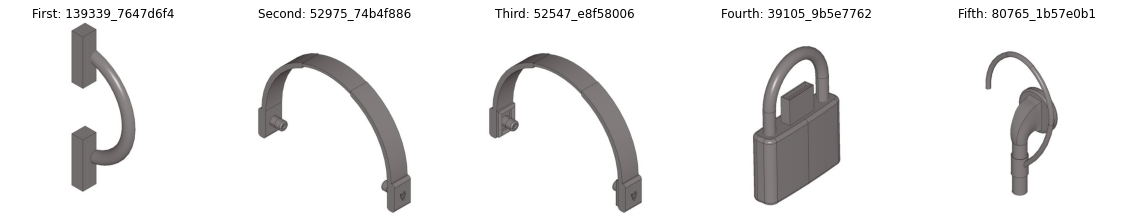

In [293]:
test_results = []

for j in range(len(raw_train)):
    cosim = cosine_similarity(raw_train.loc[j][1:],test_raw_dt.loc[6][1:])
    test_results.append((test_raw_dt['assembly_name'][6],raw_train['assembly_name'][j],cosim))

top = sorted(test_results, reverse=True, key=lambda a: a[2])

# create figure
fig = plt.figure(figsize=(20, 10))

# setting values to rows and column variables
rows = 1
columns = 5

# reading images
Image1 = cv2.imread(f'{top[0][1]}.jpg')
Image2 = cv2.imread(f'{top[1][1]}.jpg')
Image3 = cv2.imread(f'{top[2][1]}.jpg')
Image4 = cv2.imread(f'{top[3][1]}.jpg')
Image5 = cv2.imread(f'{top[4][1]}.jpg')
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title(f"First: {top[0][1]}")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title(f"Second: {top[1][1]}")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title(f"Third: {top[2][1]}")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title(f"Fourth: {top[3][1]}")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title(f"Fifth: {top[4][1]}")